In [1]:
import torch, torchvision, glob
from PIL import Image
from concrete_cracks_dataset import ConcreteCracksDataset
import torchvision.transforms as tt
import matplotlib.pyplot as plt
from Unet import Unet

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#DEVICE = torch.device('cpu')
model = Unet().to(DEVICE)
model.load_state_dict(torch.load('./model_versions/unet50epochs'))

image_paths_negative = glob.glob(".\\Concrete\\Negative\\Images\\*.jpg",recursive=False)
mask_paths_negative = glob.glob(".\\Concrete\\Negative\\Masks\\*.jpg",recursive=False)
image_paths_positive = glob.glob(".\\Concrete\\Positive\\Images\\*.jpg",recursive=False)
mask_paths_positive = glob.glob(".\\Concrete\\Positive\\Masks\\*.jpg",recursive=False)

In [4]:
i = 30 # i in range(0, batch_size-1)
to_tensor = tt.ToTensor()
images =  to_tensor(Image.open(image_paths_positive[i])).to(DEVICE).unsqueeze(0)
masks = to_tensor(Image.open(mask_paths_positive[i])).to(DEVICE).unsqueeze(0)

for i in range(i,i+5):
    images = torch.cat((images, to_tensor(Image.open(image_paths_positive[i])).to(DEVICE).unsqueeze(0)), 0)
    masks = torch.cat((masks, to_tensor(Image.open(mask_paths_positive[i])).to(DEVICE).unsqueeze(0)), 0)

with torch.no_grad():
    model.eval()
    predict = model(images)

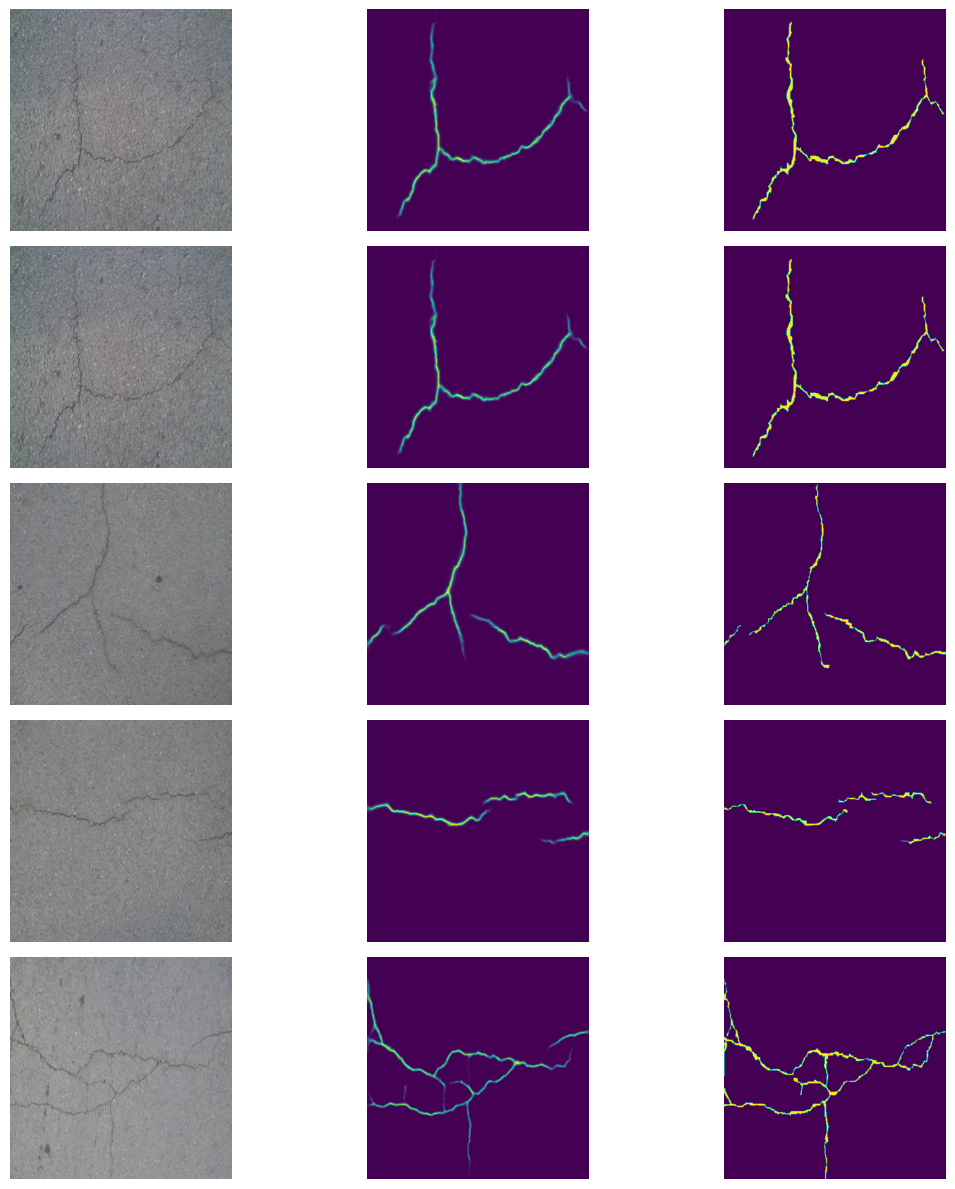

In [5]:
fig, rows, columns, j = plt.figure(figsize=(12,12)), 5, 3, 1
for i in range(len(images)-1):
    img_dim = images[i].permute(1, 2, 0).cpu()
    predict_dim = predict[i].permute(1,2,0).cpu()
    msk_dim = masks[i].permute(1,2,0).cpu()

    fig.add_subplot(rows, columns, j)
    plt.imshow(img_dim)
    plt.axis('off')
    fig.add_subplot(rows, columns, j+1)
    plt.imshow(torch.sigmoid(predict_dim))
    plt.axis('off')
    fig.add_subplot(rows, columns, j+2)
    plt.imshow(msk_dim)
    plt.axis('off')
    j += 3

fig.tight_layout()
